# Logistic Regression

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [2]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

60000 train samples
10000 test samples
image shape (28, 28)


label:  5


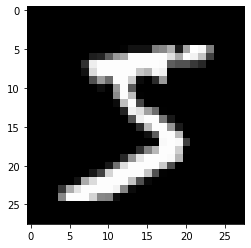

In [3]:
sample = 0
print('label: ', y_train[sample])
image = x_train[sample]

plt.imshow(image, cmap='gray')
plt.show()

In [4]:
input_dim = 28 * 28 #784

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model

In [5]:
model = keras.Sequential([layers.Dense(num_classes, activation="softmax")])

In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 

In [7]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test), verbose = 1)

Epoch 1/10
938/938 [==============================] - 1s 745us/step - loss: 0.9994 - accuracy: 0.7652 - val_loss: 0.6079 - val_accuracy: 0.8579
Epoch 2/10
938/938 [==============================] - 1s 636us/step - loss: 0.5580 - accuracy: 0.8638 - val_loss: 0.4811 - val_accuracy: 0.8784
Epoch 3/10
938/938 [==============================] - 1s 619us/step - loss: 0.4760 - accuracy: 0.8773 - val_loss: 0.4293 - val_accuracy: 0.8896
Epoch 4/10
938/938 [==============================] - 1s 608us/step - loss: 0.4362 - accuracy: 0.8853 - val_loss: 0.4009 - val_accuracy: 0.8950
Epoch 5/10
938/938 [==============================] - 1s 631us/step - loss: 0.4115 - accuracy: 0.8895 - val_loss: 0.3817 - val_accuracy: 0.8988
Epoch 6/10
938/938 [==============================] - 1s 639us/step - loss: 0.3944 - accuracy: 0.8933 - val_loss: 0.3675 - val_accuracy: 0.9005
Epoch 7/10
938/938 [==============================] - 1s 628us/step - loss: 0.3815 - accuracy: 0.8961 - val_loss: 0.3571 - val_accuracy:

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


Number of parameters = 7850: (28 * 28 * 10 + 10 (bias))

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

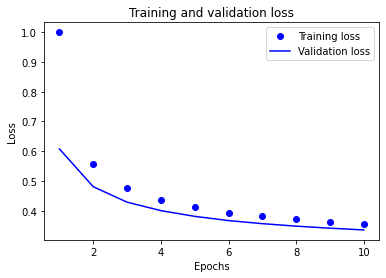

In [10]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.33615320920944214
Test accuracy: 0.9075000286102295


## Train, Validation, Test data

In [12]:
model = keras.Sequential([layers.Dense(num_classes, activation="softmax")])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2, verbose = 2)

Epoch 1/10
750/750 - 1s - loss: 1.0840 - accuracy: 0.7446 - val_loss: 0.6523 - val_accuracy: 0.8613
Epoch 2/10
750/750 - 0s - loss: 0.6033 - accuracy: 0.8563 - val_loss: 0.5052 - val_accuracy: 0.8779
Epoch 3/10
750/750 - 0s - loss: 0.5088 - accuracy: 0.8714 - val_loss: 0.4483 - val_accuracy: 0.8853
Epoch 4/10
750/750 - 0s - loss: 0.4630 - accuracy: 0.8795 - val_loss: 0.4159 - val_accuracy: 0.8917
Epoch 5/10
750/750 - 0s - loss: 0.4349 - accuracy: 0.8845 - val_loss: 0.3952 - val_accuracy: 0.8952
Epoch 6/10
750/750 - 0s - loss: 0.4154 - accuracy: 0.8894 - val_loss: 0.3800 - val_accuracy: 0.8997
Epoch 7/10
750/750 - 0s - loss: 0.4008 - accuracy: 0.8918 - val_loss: 0.3687 - val_accuracy: 0.9015
Epoch 8/10
750/750 - 0s - loss: 0.3893 - accuracy: 0.8945 - val_loss: 0.3598 - val_accuracy: 0.9036
Epoch 9/10
750/750 - 0s - loss: 0.3801 - accuracy: 0.8964 - val_loss: 0.3523 - val_accuracy: 0.9052
Epoch 10/10
750/750 - 0s - loss: 0.3723 - accuracy: 0.8982 - val_loss: 0.3465 - val_accuracy: 0.9062

In [13]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.3473134934902191
Test accuracy: 0.9071000218391418


## Callbacks

In [14]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

model = keras.Sequential([layers.Dense(num_classes, activation="softmax")])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    callbacks = my_callbacks,
                    validation_split=0.2, verbose = 2)

Epoch 1/10
750/750 - 1s - loss: 1.0918 - accuracy: 0.7399 - val_loss: 0.6611 - val_accuracy: 0.8575
Epoch 2/10
750/750 - 0s - loss: 0.6116 - accuracy: 0.8543 - val_loss: 0.5114 - val_accuracy: 0.8762
Epoch 3/10
750/750 - 0s - loss: 0.5149 - accuracy: 0.8701 - val_loss: 0.4531 - val_accuracy: 0.8850
Epoch 4/10
750/750 - 0s - loss: 0.4679 - accuracy: 0.8780 - val_loss: 0.4201 - val_accuracy: 0.8917
Epoch 5/10
750/750 - 0s - loss: 0.4389 - accuracy: 0.8837 - val_loss: 0.3987 - val_accuracy: 0.8942
Epoch 6/10
750/750 - 0s - loss: 0.4189 - accuracy: 0.8876 - val_loss: 0.3834 - val_accuracy: 0.8975
Epoch 7/10
750/750 - 0s - loss: 0.4038 - accuracy: 0.8904 - val_loss: 0.3717 - val_accuracy: 0.9001
Epoch 8/10
750/750 - 0s - loss: 0.3920 - accuracy: 0.8937 - val_loss: 0.3629 - val_accuracy: 0.9017
Epoch 9/10
750/750 - 0s - loss: 0.3826 - accuracy: 0.8957 - val_loss: 0.3552 - val_accuracy: 0.9032
Epoch 10/10
750/750 - 0s - loss: 0.3746 - accuracy: 0.8971 - val_loss: 0.3491 - val_accuracy: 0.9043